In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop


In [3]:
import glob
import cv2
import numpy as np

with tf.device('/device:GPU:0'):

  IMG_DIR='/content/drive/MyDrive/PIAIC/flower-recognition/daisy'
  IMG_DIR1='/content/drive/MyDrive/PIAIC/flower-recognition/dandelion'
  IMG_DIR2='/content/drive/MyDrive/PIAIC/flower-recognition/rose'
  IMG_DIR3='/content/drive/MyDrive/PIAIC/flower-recognition/sunflower'
  IMG_DIR4='/content/drive/MyDrive/PIAIC/flower-recognition/tulip'

  def read_images(directory):
      for img in glob.glob(directory+"/*.jpg"):
          image = cv2.imread(img)
          resized_img = cv2.resize(image/255.0  , (180 ,180))

          yield resized_img

  resized_imgs0 =  np.array(list(read_images(IMG_DIR)))
  resized_imgs1 =  np.array(list(read_images(IMG_DIR1)))
  resized_imgs2 =  np.array(list(read_images(IMG_DIR2)))
  resized_imgs3 =  np.array(list(read_images(IMG_DIR3)))
  resized_imgs4 =  np.array(list(read_images(IMG_DIR4)))

In [4]:
label0 = np.zeros((resized_imgs0.shape[0],1))   #0
label1 = np.ones((resized_imgs1.shape[0],1))  #1
label2 = np.ones((resized_imgs2.shape[0],1))*2 #2
label3 = np.ones((resized_imgs3.shape[0],1))*3 #3
label4 = np.ones((resized_imgs4.shape[0],1))*4  #4

In [5]:
data = np.concatenate((resized_imgs0,resized_imgs1,resized_imgs2,resized_imgs3,resized_imgs4))

In [6]:
del resized_imgs0
del resized_imgs1
del resized_imgs2
del resized_imgs3
del resized_imgs4

In [7]:
data= data.reshape(data.shape[0], data.shape[1]*data.shape[2]*data.shape[3])

In [8]:
labels = np.concatenate((label0,label1,label2,label3,label4))

In [9]:

del label0
del label1
del label2
del label3
del label4

In [10]:
import pandas as pd
data = pd.DataFrame(data)
data['labels'] = labels.astype('float32')

In [11]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels=train_test_split(data.iloc[0:,:-1], data['labels'], test_size=0.3, random_state=42, stratify = labels)

In [12]:
del data

In [13]:
train_data = np.array(train_data).reshape(len(train_data),180,180,3)
# test_data.reshape(150,150,3)

In [14]:
test_data = np.array(test_data).reshape(len(test_data),180,180,3)

In [15]:
train_labels = np.array(train_labels).astype('float32')
test_labels = np.array(test_labels).astype('float32')

In [16]:
# from keras.utils import to_categorical
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

In [17]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    # featurewise_center=True,
    # samplewise_center=True,
    # featurewise_std_normalization=True,
    # samplewise_std_normalization=True,
    # zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.3,
    zoom_range=0.2,
    channel_shift_range=0.3,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

In [18]:
data_gen.fit(train_data)

In [19]:
data_gen.fit(test_data)

In [33]:
#MOdels with COnv2D and Maxpooling
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(180, 180, 3,)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [34]:
model.compile(optimizer=RMSprop(learning_rate= 0.0001),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [35]:
%tensorflow_version 2.x
import tensorflow as tf

In [ ]:
with tf.device('/device:GPU:0'):
  result = model.fit(
          x= train_data,
          y= train_labels,
          batch_size = 30,
          steps_per_epoch=30,
          epochs=500,
          validation_split=0.3,
          validation_steps=10,
          validation_batch_size=10)

Epoch 1/500
30/30 [==============================] - 3s 63ms/step - loss: 1.6077 - accuracy: 0.2146 - val_loss: 1.5628 - val_accuracy: 0.3700
Epoch 2/500
30/30 [==============================] - 1s 41ms/step - loss: 1.5735 - accuracy: 0.2852 - val_loss: 1.4714 - val_accuracy: 0.3500
Epoch 3/500
30/30 [==============================] - 1s 41ms/step - loss: 1.4597 - accuracy: 0.3762 - val_loss: 1.2895 - val_accuracy: 0.5100
Epoch 4/500
30/30 [==============================] - 1s 41ms/step - loss: 1.3403 - accuracy: 0.4272 - val_loss: 1.2207 - val_accuracy: 0.5400
Epoch 5/500
30/30 [==============================] - 1s 41ms/step - loss: 1.2963 - accuracy: 0.4284 - val_loss: 1.1375 - val_accuracy: 0.5500
Epoch 6/500
30/30 [==============================] - 1s 41ms/step - loss: 1.2903 - accuracy: 0.4349 - val_loss: 1.1244 - val_accuracy: 0.5100
Epoch 7/500
30/30 [==============================] - 1s 41ms/step - loss: 1.2306 - accuracy: 0.4836 - val_loss: 1.1482 - val_accuracy: 0.5300
Epoch 

In [24]:
model.evaluate(test_data,test_labels)

41/41 [==============================] - 1s 21ms/step - loss: 0.8479 - accuracy: 0.6669


[0.8479395508766174, 0.6669236421585083]

In [25]:
x = result.history.keys()
x

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

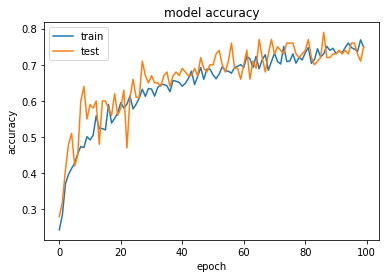

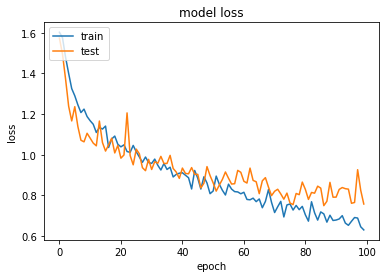

In [26]:

# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
y_pred1 = model.predict(test_data)

In [28]:
y_pred1.shape

(1297, 5)

In [29]:
# list1 = []
# for i in range(0,len(validation_generator)):
#   for j in range(0,val_batch):
#     try:
#       list1.append(validation_generator[i][1][j].tolist())
#     except:
#       break

In [30]:
np.argmax(y_pred1, axis=1)[0:30]

array([4, 0, 4, 4, 4, 3, 1, 3, 2, 2, 3, 4, 4, 2, 4, 2, 0, 4, 4, 1, 1, 0,
       4, 3, 1, 4, 3, 0, 4, 1])

In [31]:
np.array(test_labels[0:30]).astype('int32')

array([4, 0, 2, 4, 4, 4, 1, 3, 4, 2, 3, 3, 4, 2, 2, 4, 2, 2, 2, 1, 1, 0,
       4, 3, 1, 4, 3, 1, 4, 1], dtype=int32)

In [32]:
plt.figure(figsize = (20,20))
for i in range(10):
    img = train_datagen[600*i][0]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(train_datagen[600*i][1])
plt.show()

NameError: ignored

<Figure size 1440x1440 with 0 Axes>